---
**IMPORTS**

---

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string


#Food.com Recipes and Interactions data

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
def open_csv(path, nrowss= 20000):
  df = pd.read_csv(path ,delimiter= ',' ,nrows= nrowss)
  df.dataframeName = path
  nRow, nCol = df.shape
  print(f'There are {nRow} rows and {nCol} columns')
  return df

###print(df_u[df_u['id'] == 0000])###

---
**Exploratory Data Analysis (EDA) on the data**

---

In [4]:
df_RAW_recipes = open_csv('RAW_recipes.csv', 100000)
df_RAW_recipes.head()
#id, name, contributor, tags, description, ingredients


There are 100000 rows and 12 columns


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
df_RAW_interactions = open_csv('RAW_interactions.csv', 60000)
df_RAW_interactions.head()
#

There are 60000 rows and 5 columns


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [6]:
df_interactions_train = open_csv('interactions_train.csv')
df_interactions_train.head(5)

There are 20000 rows and 6 columns


,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [7]:
df_PP_users = open_csv('PP_users.csv')
df_PP_users.head(5)


There are 20000 rows and 6 columns


,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [8]:
df_PP_recipes = open_csv('PP_recipes.csv',50000)
df_PP_recipes.head()

#id, calorie_level

There are 50000 rows and 8 columns


,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [9]:
from os import listxattr
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]
        if len(names) > 4:
            names = names[:4]
        return names
    return []


def get_list(lst):
  if lst != None:
      if len(lst) > 3:
        names = lst[:3]
        return names
      return lst
  return []


def clean_data(row):
    if isinstance(row, list):
        n_row = [str.lower(i.replace(" ", "")) for i in row]
        n_row = [str.lower(i.replace("'", "")) for i in row]
        n_row = [str.lower(i.replace("[", "")) for i in n_row]
        n_row = [str.lower(i.replace("]", "")) for i in n_row]
        n_row = [str.lower(i.replace("'", "")) for i in n_row]
        n_row = [str.lower(i.replace("\r\\", "")) for i in n_row]
        n_row = [str.lower(i.replace("-or-less", "")) for i in n_row]
        return [str.lower(i.replace("[", "")) for i in n_row]
    else:
        if isinstance(row, str):
          n_row = str.lower(row.replace("\\r\\", ""))
          return str.lower(n_row.replace(" ", ""))
        else:
            return ""

def Convert(string):
  if str(string) != 'nan':
    li = list(string.split(" "))
    return li
  return 0

def spliter(string):
  if str(string) != 'nan':
    li = list(string.split(","))
    return li
  return 0

stop_words = stopwords.words('english')
stop_words.append(',')
stop_words.append('.')
stop_words.append(zip('a','z'))



def remove_stop_words(row_tokens):
  filtered_sentence = []
  
  for w in row_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)

  return filtered_sentence

In [10]:
#id, name, contributor, tags, description, calorie_level
finel_dataset = df_RAW_recipes[['id', 'name', 'contributor_id', 'tags', 'description', 'ingredients']]
tmp_d = df_PP_recipes[['id', 'calorie_level']]
finel_dataset = finel_dataset.merge(tmp_d, on='id')

finel_dataset['description'] = finel_dataset['description'].apply(Convert)
finel_dataset

,id,name,contributor_id,tags,description,ingredients,calorie_level
0,137739,arriba baked winter squash mexican style,47892,"['60-minutes-or-less', 'time-to-make', 'course...","[autumn, is, my, favorite, time, of, year, to,...","['winter squash', 'mexican seasoning', 'mixed ...",0
1,31490,a bit different breakfast pizza,26278,"['30-minutes-or-less', 'time-to-make', 'course...","[this, recipe, calls, for, the, crust, to, be,...","['prepared pizza crust', 'sausage patty', 'egg...",0
2,75452,beat this banana bread,15892,"['weeknight', 'time-to-make', 'course', 'main-...","[from, ann, hodgman's, ]","['sugar', 'unsalted butter', 'bananas', 'eggs'...",2
3,63986,chicken lickin good pork chops,14664,"['weeknight', 'time-to-make', 'course', 'main-...","[here's, and, old, standby, i, enjoy, from, ti...","['lean pork chops', 'flour', 'salt', 'dry must...",0
4,23850,cream of cauliflower soup vegan,3288,"['lactose', 'weeknight', 'time-to-make', 'cour...","[this, is, a, dairy, free, ]","['canola oil', 'onion', 'garlic', 'cauliflower...",0
...,...,...,...,...,...,...,...
21659,33193,grilled steak with roasted garlic and herbs,21399,"['60-minutes-or-less', 'time-to-make', 'course...","[a, steak, that, garlic, lovers, are, gonna, w...","['garlic', 'fresh basil', 'fresh rosemary', 'o...",1
21660,70643,grilled steakhouse sirloin with garlic mushroo...,18660,"['60-minutes-or-less', 'time-to-make', 'course...","[our, grocery, store, cooks, featured, items, ...","['butter', 'mushroom gravy mix', 'garlic', ""mc...",2
21661,289037,grilled steaks with mustard and chives,463435,"['30-minutes-or-less', 'time-to-make', 'course...","[this, is, a, nice, steak, to, fix, when, the,...","['beef sirloin steaks', 'garlic pepper seasoni...",0
21662,169958,grilled stuffed chicken breasts,140981,"['30-minutes-or-less', 'time-to-make', 'course...","[wonderful, dish, that, looks, and, tastes, fa...","['fresh broccoli', 'cheddar cheese', 'boneless...",1


---
Build the Recommender System

---



In [11]:
features = ["tags", "description", "ingredients"]

In [12]:
finel_dataset['ingredients'] = finel_dataset['ingredients'].apply(spliter)
finel_dataset['tags'] = finel_dataset['tags'].apply(spliter)


In [13]:
for feature in features:
  finel_dataset[feature] = finel_dataset[feature].apply(clean_data)


In [14]:
finel_dataset['description'] = finel_dataset['description'].apply(remove_stop_words)

for w in finel_dataset['tags']:
  if ' time-to-make' in w:
   w.remove(' time-to-make')

In [15]:
for feature in features:
  finel_dataset[feature] = finel_dataset[feature].apply(get_list)


In [16]:
def create_soup(features):
  return ' '.join(features['tags']) + ' '.join(features['description']) + ' '.join(features['ingredients']) + ' ' + str(features['contributor_id']) + ' ' + str(features['calorie_level'])

#{soup : 'contributor' + 'tags' + 'review' + 'description' + 'calorie_level'}
finel_dataset["soup"] = finel_dataset.apply(create_soup, axis=1)


finel_dataset

,id,name,contributor_id,tags,description,ingredients,calorie_level,soup
0,137739,arriba baked winter squash mexican style,47892,"[60-minutes, course, main-ingredient]","[autumn, favorite, time]","[winter squash, mexican seasoning, mixed spice]",0,60-minutes course main-ingredientautumn favo...
1,31490,a bit different breakfast pizza,26278,"[30-minutes, course, main-ingredient]","[recipe, calls, crust]","[prepared pizza crust, sausage patty, eggs]",0,30-minutes course main-ingredientrecipe call...
2,75452,beat this banana bread,15892,"[weeknight, course, main-ingredient]","[ann, hodgmans, ]","[sugar, unsalted butter, bananas]",2,weeknight course main-ingredientann hodgmans...
3,63986,chicken lickin good pork chops,14664,"[weeknight, course, main-ingredient]","[heres, old, standby]","[lean pork chops, flour, salt]",0,weeknight course main-ingredientheres old st...
4,23850,cream of cauliflower soup vegan,3288,"[lactose, weeknight, course]","[dairy, free, ]","[canola oil, onion, garlic]",0,lactose weeknight coursedairy free canola oi...
...,...,...,...,...,...,...,...,...
21659,33193,grilled steak with roasted garlic and herbs,21399,"[60-minutes, course, main-ingredient]","[steak, garlic, lovers]","[garlic, fresh basil, fresh rosemary]",1,60-minutes course main-ingredientsteak garli...
21660,70643,grilled steakhouse sirloin with garlic mushroo...,18660,"[60-minutes, course, main-ingredient]","[grocery, store, cooks]","[butter, mushroom gravy mix, garlic]",2,60-minutes course main-ingredientgrocery sto...
21661,289037,grilled steaks with mustard and chives,463435,"[30-minutes, course, main-ingredient]","[nice, steak, fix]","[beef sirloin steaks, garlic pepper seasoning...",0,30-minutes course main-ingredientnice steak ...
21662,169958,grilled stuffed chicken breasts,140981,"[30-minutes, course, main-ingredient]","[wonderful, dish, looks]","[fresh broccoli, cheddar cheese, boneless ch...",1,30-minutes course main-ingredientwonderful d...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# We have to use these other parameters because I SAID SO
vec = TfidfVectorizer(stop_words='english')
matrix = vec.fit_transform(finel_dataset["soup"])
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,01,02,04,06,07,08,09,09olive,0ground,...,zwt6leeks,zwt7,zwt8coconut,zwt9coconut,zwtavocados,zwtbrown,zwtcream,zwtfresh,zwtshrimp,zwtsteak
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
knn2 = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn2.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [19]:
finel_dataset = finel_dataset.reset_index()
cbf_recipe_names = pd.Series(finel_dataset.index, index=finel_dataset['name'])

cbf_recipe_names = pd.Series(finel_dataset.index, index=finel_dataset["name"]).drop_duplicates()

cbf_recipe_names.head()

name
arriba   baked winter squash mexican style    0
a bit different  breakfast pizza              1
beat this  banana bread                       2
chicken lickin  good  pork chops              3
cream  of cauliflower soup  vegan             4
dtype: int64

In [20]:
def get_CBF_recommendations(name, cbf_recipe_names):
  if name in cbf_recipe_names:
    idx = cbf_recipe_names[name]
    n_recipe_to_reccomend = 10


    distances , indices = knn2.kneighbors(matrix[idx],n_neighbors=n_recipe_to_reccomend+1)  

    rec_recipe_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1], reverse=True)


    recommend_frame = []
    c=0
    for val in rec_recipe_indices:
      recipe_idx = finel_dataset.iloc[val[0]]['id']
      idx = df_RAW_recipes[df_RAW_recipes['id'] == recipe_idx].index

      if idx != None:
        recommend_frame.append({'Name':df_RAW_recipes.iloc[idx]['name'].values[0],'Present':val[1]*100})
        c = c+1
    df = pd.DataFrame(recommend_frame,index=range(1,c+1))
    return df

  else:
    return "No recipes found. Please check your input"



----
----

In [21]:
#CBF Names
name = "cream  of cauliflower soup  vegan"
name1 = "i yam what i yam  muffins"

print("#############################################################")
print("################ Content Based Filtering ####################")
print("#############################################################")

print()

print("Recommendations for: " + name + "\n")
print(get_CBF_recommendations(name, cbf_recipe_names))
print()

print("Recommendations for: " + name1 + "\n")
print(get_CBF_recommendations(name1, cbf_recipe_names))
print()


#############################################################
################ Content Based Filtering ####################
#############################################################

Recommendations for: cream  of cauliflower soup  vegan

                                            Name    Present
1                          beef stew a la italia  76.283560
2           acorn squash with cranberry stuffing  76.249675
3                        crock pot peppery roast  75.774109
4                       chicken thigh parmigiana  75.265771
5   black bean brownies  gluten free  dairy free  73.331000
6                    basil shrimp and feta pasta  73.297762
7                                 chicken athena  73.287065
8                  gluten free one bowl brownies  72.987419
9                         company garlic chicken  71.753990
10           dairy free cream soup   white sauce  54.757185
11             cream  of cauliflower soup  vegan   0.000000

Recommendations for: i yam what i ya

----
----
----
----
----

In [22]:
final_dataset_CF = df_RAW_interactions.pivot(index='recipe_id',columns='user_id',values='rating')


In [23]:
final_dataset_CF.fillna(0,inplace=True)
final_dataset_CF.head()

user_id,1533,1535,1634,1676,1755,1891,1962,2178,2211,2310,...,2002356120,2002356883,2002361612,2002365044,2002365515,2002365627,2002368192,2002369208,2002370192,2002370541
recipe_id,,,,,,,,,,,,,,,,,,,,,
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
no_recipe_voted = df_RAW_interactions.groupby('recipe_id')['rating'].agg('count')
no_user_voted = df_RAW_interactions.groupby('user_id')['rating'].agg('count')


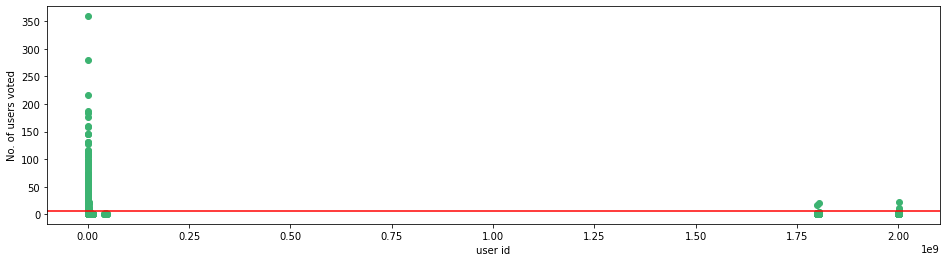

In [25]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=6,color='r')
plt.xlabel('user id')
plt.ylabel('No. of users voted')
plt.show()



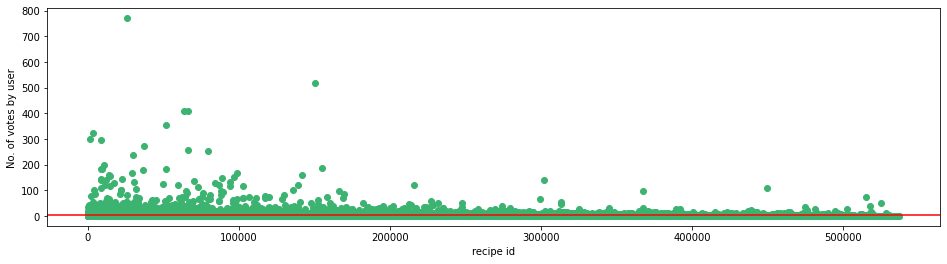

In [26]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_recipe_voted.index,no_recipe_voted,color='mediumseagreen')
plt.axhline(y=6,color='r')
plt.xlabel('recipe id')
plt.ylabel('No. of votes by user')
plt.show()

In [27]:
final_dataset_CF=final_dataset_CF.loc[:,no_user_voted[no_user_voted > 6].index]
final_dataset_CF = final_dataset_CF.loc[no_recipe_voted[no_recipe_voted > 6].index,:]
final_dataset_CF

user_id,1533,1535,2310,2312,3288,4291,4439,4470,4740,5060,...,2324285,2399085,2549237,2574795,2597942,1800054678,1802849661,2000431901,2000498330,2001102678
recipe_id,,,,,,,,,,,,,,,,,,,,,
210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
518229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
csr_data = csr_matrix(final_dataset_CF.values)
final_dataset_CF.reset_index(inplace=True)
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [29]:
cf_recipe_names = []
for recipe_id in final_dataset_CF['recipe_id']:
  id_name = df_RAW_recipes[df_RAW_recipes['id']==recipe_id]['name']
  if id_name.empty == False:
    #print(id_name.values[0])
    #print(id_name.index[0])
    cf_recipe_names.append(id_name.values[0])


In [30]:
from sklearn import preprocessing

def get_CF_recommendations(recipe_name, cf_recipe_namess=cf_recipe_names):
    n_recipe_to_reccomend = 10
    matches = [x for x in cf_recipe_namess if x == recipe_name]
    if len(matches) > 0:

      recipe_list = df_RAW_recipes[df_RAW_recipes['name'] == recipe_name]  
      recipe_id = recipe_list.iloc[0]['id']
      recipe_idx = final_dataset_CF[final_dataset_CF['recipe_id'] == recipe_id].index[0]

      distances , indices = knn.kneighbors(csr_data[recipe_idx],n_neighbors=n_recipe_to_reccomend+1)  

      rec_recipe_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1], reverse=True)

      recommend_frame = []
      c=0      

      for val in rec_recipe_indices:
          recipe_idxx = final_dataset_CF.iloc[val[0]]['recipe_id']
          idx = df_RAW_recipes[df_RAW_recipes['id'] == recipe_idxx].index

          if idx != None:
            recommend_frame.append({'Name':df_RAW_recipes.iloc[idx]['name'].values[0],'Present':val[1]*100})
            c = c+1
      
      df = pd.DataFrame(recommend_frame,index=range(1,c+1))
      return df

    else:
        return "No recipes found. Please check your input"



----
----

In [31]:
#CF Names
name2 = 'berks county bread machine pizza crust'
name3 = 'bacon and cheese deviled eggs'

print("################################################################")
print("################ Item to Item collaborative filtering ##########")
print("################################################################")

print()

print("Recommendations for: " + name2 + "\n")
print(get_CF_recommendations(name2,cf_recipe_names))
print()

print("Recommendations for: " + name3 + "\n")
print(get_CF_recommendations(name3,cf_recipe_names))
print()



################################################################
################ Item to Item collaborative filtering ##########
################################################################

Recommendations for: berks county bread machine pizza crust

                                     Name       Present
1        easy hash browns bacon casserole  7.088887e+01
2                  cream of broccoli soup  6.837722e+01
3           cantaloupe and cucumber salad  6.774089e+01
4           beef  cheese  and noodle bake  6.619383e+01
5                     banana chip cookies  6.570028e+01
6  berks county bread machine pizza crust  1.110223e-14

Recommendations for: bacon and cheese deviled eggs

No recipes found. Please check your input



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


----
----
----
----
----

In [32]:
Hybrid_recomennd_names = []
for a in cf_recipe_names:
  for b in cbf_recipe_names.index:
    if a == b:
      Hybrid_recomennd_names.append(a)


['african ginger cake', 'daisy mae s fried apples', 'chicken zucchini casserole', 'chocolate mint candy  fudge', 'apple scones', 'cherry pie', 'chicken braised with 40 cloves of garlic', 'garlicky clam dip', 'chicken  n  vegetable stir fry', 'bourbon steak', 'blueberry cake', 'great aunt fannie old traditional potato soup', 'banana nut cake', 'best beef stew', 'fabulous chili con carne with beans', 'classic potato salad', '5 cup pecan pie', 'garlic shrimp spaghetti', 'baked mustard chicken', 'chile verde  beef or pork', 'chicken noodle soup', 'chicken breasts supreme', 'glazed lemon cake', 'badam burfi  almond squares', 'grilled cheese deluxe', 'avocado and prawns in wasabi', 'banana oatmeal cookies with banana frosting', 'creamy fruit salad', 'corned beef and cabbage', 'beef pizzaiola', 'bean and salsa soup', 'downeast oven scallops', 'baked macaroni', 'ginger peanut soup', 'chasen s chili', 'deluxe spiced tea mix', 'apple sage stuffed pork chops', 'chocolate banana cake', 'dijon burg

In [35]:
def get_Hybrid_recommendations(recipe_name, hybrid_recomennd_namess = Hybrid_recomennd_names, cf_recipe_namess=cf_recipe_names, cbf_recipe_names=cbf_recipe_names):
  if recipe_name in hybrid_recomennd_namess:
    CBF_data = get_CBF_recommendations(recipe_name, cbf_recipe_names)  #cbf
    CF_data = get_CF_recommendations(recipe_name, cf_recipe_namess) #cf
    hybrid_data = pd.concat([CF_data, CBF_data], ignore_index=False, sort=False) 
    hybrid_data = hybrid_data.sort_values(by=['Present'], ascending=False)
    hybrid_data.reset_index(drop=True, inplace=True)
    return hybrid_data[0:10]


  else:
    return "No recipes found. Please check your input"


---
---

In [36]:
name4 = 'bean and cheese quesadilla'
name5 = 'greek meatloaf with feta'

print("######################################################")
print("################ Hybrid Filtering ####################")
print("######################################################")
print()

print("Recommendations for: " + name4 + "\n")
print(get_Hybrid_recommendations(name4, Hybrid_recomennd_names, cf_recipe_names, cbf_recipe_names))
print()

print("######################################################")
print("################ Hybrid Filtering ####################")
print("######################################################")
print()

print("Recommendations for: " + name5 + "\n")
print(get_Hybrid_recommendations(name5, Hybrid_recomennd_names, cf_recipe_names, cbf_recipe_names))
print()

######################################################
################ Hybrid Filtering ####################
######################################################

Recommendations for: bean and cheese quesadilla



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


                                     Name    Present
0              cheese filled jumbo shells  81.168911
1  baked calf liver and onions with gravy  74.735442
2                      anasazi enchiladas  71.315851
3              broccoli   cranberry salad  71.077325
4         extremely easy quesadilla pizza  70.296669
5                      chocolate fountain  66.313923
6                   breakfast quesadillas  66.184224
7              cheese enchiladas for oamc  65.679378
8        creamy cheesy crock pot bean dip  65.161678
9        easy pizza pasta casserole  oamc  65.035910

######################################################
################ Hybrid Filtering ####################
######################################################

Recommendations for: greek meatloaf with feta

                                       Name    Present
0  chicken mushroom and mozzarella marinara  78.755054
1                         blackened redfish  78.527581
2           feta chicken with fresh or

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


---
---
---
---
---

---
Get recommendations for the Recipes

---

In [38]:

def get_top_10():
  top_ten = sorted(list(zip(no_recipe_voted.index,list(no_recipe_voted))),key=lambda x: x[1], reverse=True)
  top_ten = top_ten[0:50]

  recommend_frame = []
  c=0     

  for val in top_ten:
    if len(recommend_frame) < 10:
      recipe_idxx = val[0]
      idx = df_RAW_recipes[df_RAW_recipes['id'] == recipe_idxx].index

      if idx != None:
        recommend_frame.append({'Name':df_RAW_recipes.iloc[idx]['name'].values[0],'Best Rated':val[1]})
        c = c+1


  df = pd.DataFrame(recommend_frame,index=range(1,c+1))
  return df

In [39]:
def get_recommendation(recipe_name, hybrid_recomennd_namess = Hybrid_recomennd_names, cf_recipe_namess=cf_recipe_names, cbf_recipe_name=cbf_recipe_names):
  print("################################################################")
  find_name = None
  find_name_list = pd.Series(Hybrid_recomennd_names)
  find_name_list = find_name_list[find_name_list.str.contains(recipe_name, regex=True)]
  if find_name_list.empty == False:
    find_name = find_name_list.iloc[0] 


  if recipe_name in hybrid_recomennd_namess:
    print("################ Hybrid Filtering ##############################")
    res = get_Hybrid_recommendations(recipe_name, Hybrid_recomennd_names, cf_recipe_namess, cbf_recipe_names)

  elif recipe_name in cf_recipe_namess:
    print("################ Item to Item collaborative Filtering ##########")
    res = get_CF_recommendations(recipe_name, cf_recipe_namess)

  elif recipe_name in cbf_recipe_names.index:
    print("################ Content Based Filtering #######################")  
    res = get_CBF_recommendations(recipe_name, cbf_recipe_names)

  elif find_name != None:
    res = get_recommendation(find_name)
    
  else:
    #res = "No recipes found. Please check your input"
    res = get_top_10()
  print("################################################################")

  print("\n--- Recommendations for: " + recipe_name + " ---\n")

  return res


In [40]:
def show_results(res):
  if type(res) != str:
    print(res.head(10))
    print()

  else:
    print(res)


In [41]:
#CBF Names
name = "cream  of cauliflower soup  vegan"
name1 = "i yam what i yam  muffins"
#CF Names
name2 = 'berks county bread machine pizza crust'
name3 = 'bacon and cheese deviled eggs'
#CBF and CF Names => Hybrid Names
name4 = 'best beef stew'
name5 = 'greek meatloaf with feta'

r = get_recommendation(name5, Hybrid_recomennd_names, cf_recipe_names, cbf_recipe_names)

show_results(r)

################################################################
################ Hybrid Filtering ##############################
################################################################

--- Recommendations for: greek meatloaf with feta ---

                                       Name    Present
0  chicken mushroom and mozzarella marinara  78.755054
1                         blackened redfish  78.527581
2           feta chicken with fresh oregano  78.503091
3                      easy taco appetizers  78.426671
4                      baked pizza sandwich  77.958816
5                      easy spinach lasagne  77.697986
6                             big mac sauce  77.594464
7                         garlicky clam dip  77.594464
8     creamy smothered ground beef burritos  76.889897
9           baked maple and cinnamon squash  75.455020



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


---
---
---

In [42]:
aaa = 'afr'
r2 = get_recommendation(aaa, Hybrid_recomennd_names, cf_recipe_names, cbf_recipe_names)
show_results(r2)

################################################################
################################################################
################ Hybrid Filtering ##############################
################################################################

--- Recommendations for: african ginger cake ---

################################################################

--- Recommendations for: afr ---

                                     Name    Present
0                 blueberry yum yum  cake  86.100158
1                 golden bacardi rum cake  86.098757
2                 cherry and vanilla cake  86.069536
3              andrea s pound cake recipe  85.841458
4  banana cake with cream cheese frosting  85.719602
5                 chocolate fruit muffins  85.529605
6             coconut coffee liqueur cake  85.044439
7                german chocolate cookies  84.674219
8                a  molasses ginger snaps  74.654367
9                         fireside coffee  68.377223



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


---
---
---

In [43]:
#Install requirements
#!pip install fastapi==0.68.1
#!pip install opencv-python==4.5.3.56
#!pip install Pillow==8.3.2
#!pip install timm==0.4.12
#!pip install python-multipart==0.0.5
#!pip install uvicorn==0.15.0



In [44]:
#!pip install nest-asyncio

In [45]:
#!pip install pyngrok

In [46]:
from typing import List

from fastapi import FastAPI, File, UploadFile
from fastapi.responses import HTMLResponse, StreamingResponse

import cv2
import io
import numpy as np

import torch
import cv2
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [47]:
from fastapi import FastAPI, Body, Request, Form
from pydantic import BaseModel
from fastapi.responses import HTMLResponse
from fastapi.templating import Jinja2Templates
import pandas as pd

In [48]:
app = FastAPI()




@app.get("/")
async def main():
    content = """
    <html>


      <body style="background-color: ##F7F3E3;">
        <h1>Please Enter The Meal That You Have Already in Youre RestRaunt</h1>

        <form action="/action" method="get" target="_blank">
          <label for="fname">First name:</label>
          <input type="text" id="fname" name="fname"><br><br>
          <label for="lname">Meal Name:</label>
          <input type="text" id="lname" name="lname"><br><br>
          <input type="submit" value="Submit">
        </form>

        <p>Click on the submit button.</p>

      </body>
    </html>
      """
    return HTMLResponse(content=content)

@app.get("/action")
async def action(fname,lname):   

  action = get_recommendation(lname, Hybrid_recomennd_names, cf_recipe_names, cbf_recipe_names).to_html();
  return HTMLResponse(content=action)


In [49]:
auth_token = "25qq61fSMP3HWpGEgmsazE9Cj94_5z91tFt9gVErsLHArduz9" #@param {type:"string"}
# Since we can't access Colab notebooks IP directly we'll use
# ngrok to create a public URL for the server via a tunnel

# Authenticate ngrok
# https://dashboard.ngrok.com/signup
# Then go to the "Your Authtoken" tab in the sidebar and copy the API key
import os
os.system(f"ngrok authtoken {auth_token}")

0

In [50]:
from pyngrok import ngrok

# Create tunnel
public_url = ngrok.connect(8000, port='8000', bind_tls=True)

In [51]:
# Check if it exists
!ps aux | grep ngrok

root        2415 29.0  0.1 726652 25024 ?        Sl   15:22   0:00 /usr/local/lib/python3.7/dist-packages/pyngrok/bin/ngrok start --none --log=stdout
root        2426  0.0  0.0  39200  6480 ?        S    15:22   0:00 /bin/bash -c ps aux | grep ngrok
root        2430  0.0  0.0  38576  5508 ?        S    15:22   0:00 grep ngrok


In [ ]:
import nest_asyncio

# Allow for asyncio to work within the Jupyter notebook cell
nest_asyncio.apply()

import uvicorn

# Run the FastAPI app using uvicorn
print(public_url)
uvicorn.run(app)

In [52]:
# Kill tunnel
#ngrok.disconnect(public_url=public_url)


NgrokTunnel: "https://f9e1-34-90-86-193.ngrok.io" -> "http://localhost:8000"
